In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17336'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.39248859882354736
Modifying nearest plan with User input
{'Plan': {'messages': [HumanMessage(content="\n1. Use the playerid_lookup function to get Shane Bieber's MLBAM player ID:\nfrom pybaseball import playerid_lookup\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'][0]\n\n2. Use the statcast_pitcher function to get Shane Bieber's pitch-level data for the 2020 season:\nfrom pybaseball import statcast_pitcher\nbieber_2020 = statcast_pitcher('2020-03-01', '2020-11-01', player_id=bieber_id)\n\n3. Filter the data to only include pitches where the 'events' column equals 'walk':\nbieber_walks = bieber_2020[bieber_2020['events'] == 'walk']\n\n4. Count the number of walks for each game date:\nwalk_counts = bieber_walks.groupby('game_date')['events'].count().reset_index()\nwalk_counts.columns = ['game_date', 'walk_count']\n\n5. Sort the data by game_date and calculate the cumulative sum:\nwalk_counts = walk_counts.s

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n\n# 1. Get Shane Bieber's MLBAM player ID\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'][0]\n\n# 2. Get Shane Bieber's pitch-level data for the 2020 season\nbieber_2020 = statcast_pitcher('2020-03-01', '2020-11-01', player_id=bieber_id)\n\n# 3. Filter the data to only include pitches where the 'events' column equals 'walk'\nbieber_walks = bieber_2020[bieber_2020['events'] == 'walk']\n\n# 4. Count the number of walks for each game date\nwalk_counts = bieber_walks.groupby('game_date')['events'].count().reset_index()\nwalk_counts.columns = ['game_date', 'walk_count']\n\n# 5. Sort the data by game_date and calculate the cumulative sum\nwalk_counts = walk_counts.sort_values('game_date').reset_index(drop=True)\nwalk_counts['cumsum'] = walk_counts['walk_count'].cumsum()\n\n# 6. Plot the 'cumsum'

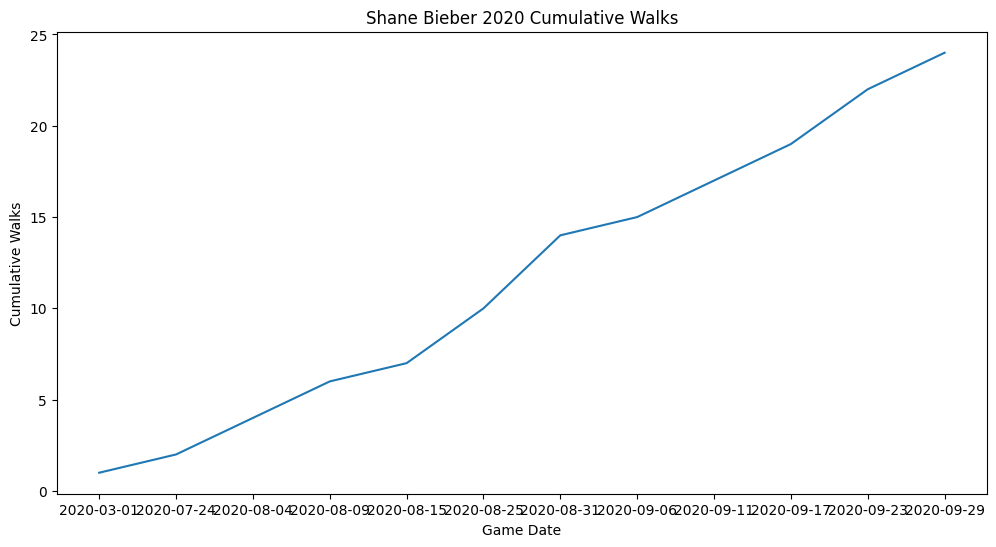

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n# 1. Get Shane Bieber's MLBAM player ID\nbieber_id = playerid_lookup('bieber', 'shane')['key_mlbam'][0]\n# 2. Get Shane Bieber's pitch-level data for the 2020 season\nbieber_2020 = statcast_pitcher('2020-03-01', '2020-11-01', player_id=bieber_id)\n# 3. Filter the data to only include pitches where the 'events' column equals 'walk'\nbieber_walks = bieber_2020[bieber_2020['events'] == 'walk']\n# 4. Count the number of walks for each game date\nwalk_counts = bieber_walks.groupby('game_date')['events'].count().reset_index()\nwalk_counts.columns = ['game_date', 'walk_count']\n# 5. Sort the data by game_date and calculate the cumulative sum\nwalk_counts = walk_counts.sort_values('game_date').reset_index(drop=True)\nwalk_counts['cumsum'] = walk_counts['walk_co

In [6]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
